In [192]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

# Based on example from here: https://statsthinking21.github.io/statsthinking21-python/08-HypothesisTesting.html

# Theoretical 

In [206]:
# Coin toss outcomes follow a binomial distribution
# Calculate the probability of getting less than 17 heads out of 21 coin tosses
p_lt_17 = scipy.stats.binom.cdf(k=16, n=21, p=0.5)
# Subtracting this number from 1 will give the probability of getting 17 or more heads out of 21 coin tosses
p_ge_17 = 1 - p_lt_17
print(p_ge_17)

0.0035986900329589844


In [196]:
# if we toss 21 coins 1,000 times how many occurances of 17 or more heads should we expect?
p_ge_17*1000

3.5986900329589844

# Try it with a simulation

In [197]:
def toss_coins_and_count_heads(num_coins=21, p_heads=0.5):
    """
    flip a coin num_coins times and return number of heads
    """

    # pull random numbers between 0 and 1. if number > 0.5 then call it True (heads)
    flips = np.random.rand(num_coins) > (1 - p_heads)
    return(np.sum(flips))  # return the number of trues (heads)


In [199]:
# Run the simulation
num_runs = 1000

flip_results_df = pd.DataFrame({'n_heads': np.zeros(num_runs)})

for run in range(num_runs):
    flip_results_df.loc[run, 'n_heads'] = toss_coins_and_count_heads()

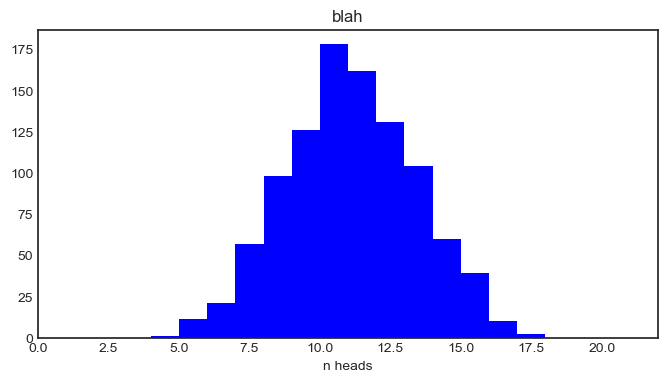

In [200]:
# see the outcomes
with plt.style.context('seaborn-white', after_reset=True):
    plt.figure(figsize=(8, 4))
    plt.hist(flip_results_df.n_heads, bins=[*range(1, 22, 1)], density=False, color='blue')
    plt.xlabel("n heads")
    plt.title("blah")
    plt.grid(False)
    plt.show()

In [201]:
# how many runs got 17 or more heads?
flip_results_df.loc[flip_results_df["n_heads"]>=17]

,n_heads
784,17.0
815,17.0


In [202]:
# what percent of runs had strictly less than 17 heads
strictly_lt_17 = scipy.stats.percentileofscore(flip_results_df, 17, kind='strict') 

# what percent of runs had 17 or more heads
pvalue = 100 - strictly_lt_17
pvalue

0.20000000000000284